# Layer 별 역할 및 개념 파악하기

우리는 아래 그림의 
- Feature Extraction 부분과
- Fully Connected 부분을

함께 tensorflow 을 통해 구현해보도록 하겠다

![](http://solarisailab.com/wp-content/uploads/2017/05/CNNs_For_MNIST.png)

### Feature Extraction

In [1]:
# tensorflow 의 버전을 확인하자 
# 아래 예제는 2.0 버전 이상에서 돌아갑니다.


import tensorflow as tf

print(tf.__version__)

2.2.0-rc1


### Input Image

input으로 들어갈 DataSet을 들여다보면서 시각화

패키지를 로드 하자
- os
- glob
- matplotlib

In [0]:
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)


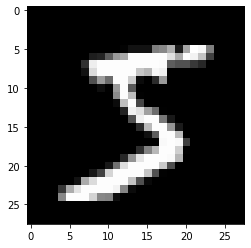

In [4]:
# 이미지 데이터 확인
image = train_x[0]
print(image.shape)
plt.imshow(image, 'gray')

In [5]:
# 이미지에 대한 차원수를 높이자
# layer의 input 으로 들어갈땐
# [batch, width, height, channel] 이 모두 들어가야한다.
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Convolution

- filter : layer에서 나갈 떄 몇개의 filter를 만들 것인가? 
- kernel_size : filter(Weight)의 사이즈
- strides : 몇개의 pixel을 skip 하면서 훑어 나갈 것인지( 사이즈에 영향을 준다) 
- padding : zero padding을 만들 것인가?, Valid는 padding이 없고, Same은 padding이 있다
- activation : Activation Function을 만들 것인가?, 설정을 안해도 Layer을 만들 수 는 있음

In [6]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='VALID', activation='relu')

In [7]:
# 위처럼 다 적을 필요 없이.. 아래와 같이도 가능하다.
tf.keras.layers.Conv2D(3, 3, 1, 'SAME')

Visualization

- tf.keras.Conv2D

### Convolution 에 이미지 데이터를 넣어 output과 filtter들의 생김새를 확인해 보도록 하자.

In [8]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [0]:
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=3, strides=(1, 1), padding='SAME')
output = layer(image)

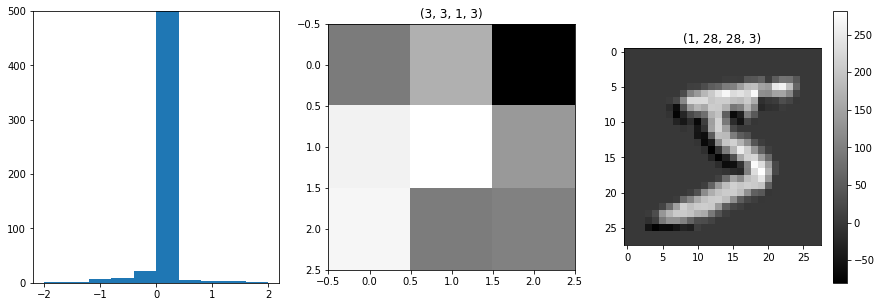

In [10]:
weight = layer.get_weights()[0]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

In [0]:
layer = tf.keras.layers.ReLU()

output = layer(output)

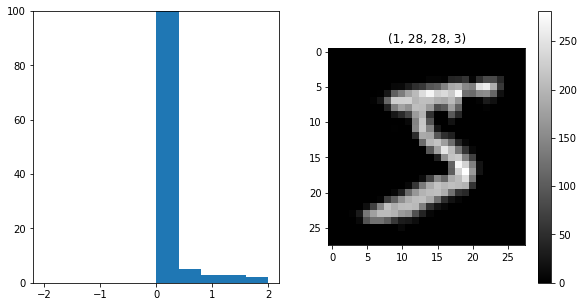

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

![](https://miro.medium.com/max/1304/1*Sh9e6Hzx8ZcOinuLvy8Fmw.png)

In [0]:
# Pooling 기법 사용 해보기  Max_pooling vs Mean_pooling
# pool_size  : 몇개를 하나로 볼것인가
# strides : 몇개의 pixel을 skip 하면서 훑어 나갈 것인지( 사이즈에 영향을 준다) 
# padding : zero padding을 만들 것인가?, 

layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output = layer(output)

(1, 14, 14, 3)


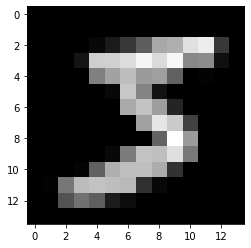

In [14]:
print(output.shape)

plt.imshow(output[0, :, :, 0], 'gray')

### Fully Connected

![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

In [15]:
# 1. Flatten 과정 
# 위 output 의 형태는 (1, 14, 14, 3) 과 같다. 
# fully connected 과정에서는 이것을 1렬로 쭉 펴서 input으로 들어 가게 된다.
# numpy 에서는 아래와 같이 reshape 를 할 수 있다. 
import numpy as np

a = np.array([[1,2,3],[4,5,6]])
a = a.reshape(-1)
a

array([1, 2, 3, 4, 5, 6])

In [0]:
# tensorflow 에서는 어떤 방법을 사용할까?
# tf.keras.layers.Flatten()

layer = tf.keras.layers.Flatten()
flatten = layer(output)

In [17]:
flatten.shape

TensorShape([1, 588])

In [18]:
# 위의 588은 어떤 값일까 ?
# 이전위에서 feature extraction 과정중 마지막 max-pooling 과정을 한 후 의 shape의 곱과 같다.
14 * 14 * 3

588

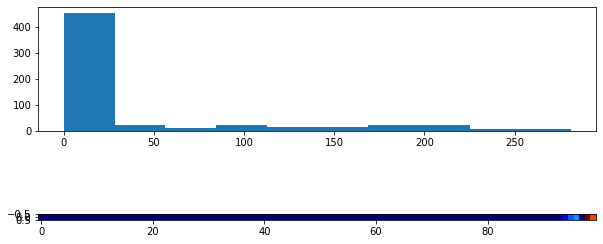

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())

plt.subplot(212)
plt.imshow(flatten[:, :100],'jet')
plt.show()

In [20]:
# Dense
# 첫번째 숫자는 unit = 내보낼 값, 다음 몇개의 노드를 만들것인가를 정하는것이다.

tf.keras.layers.Dense(32, activation = 'relu')

In [0]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(flatten)

In [22]:
output.shape

TensorShape([1, 32])

In [23]:
layer = tf.keras.layers.Dense(10, activation='relu')
output = layer(flatten)
output.shape

TensorShape([1, 10])

In [24]:
# dropout
# dropout에 관해서는 제 git NLP repository에 정리해 두었습니다.

layer = tf.keras.layers.Dropout(0.7)
output = layer(output)
output.shape
# shape에는 별다른 변화가 없다.

TensorShape([1, 10])

### Build Model

In [0]:
# 모델을 설계 해보자

# 미리 layers를 지정해줘서 위에 
# latf.keras.layers.Dropout(0.7) 처럼 길게 쓰지 않고 layers를 사용할 수 있다. 
from tensorflow.keras import layers

# 먼저 input으로 들어갈 shape을 지정해줘야 한다.
input_shape = (28, 28, 1)
num_classes = 10

In [0]:
# Feature Extraction

inputs = layers.Input(shape = input_shape)

###### Convolution Block  #####
# 처음에는 input이 들어가고
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
# 다음부터는 net만 들어간다.
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)
###### 여기까지가 Convolution Block 이라고 한다. #####


net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)



In [0]:
# Fully Connected


net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net) # num_classes = 10
# softmax 를 사용하여 확률값으려 변환 , 값을 더하면 1
net = layers.Activation('softmax')(net)

In [0]:
model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [29]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18

# Optimizer & Traning 

- tf와 layers 패키지 불러오기

In [0]:
import tensorflow as tf
from tensorflow.keras import layers

# 위에서 했던 과정 반복

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

model2 = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

#### Loss Function
Loss Function 방법들을 확인 해보자

crossentropy종류
__Categorical vs Binary__

In [0]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

In [32]:
# one-hot encoding 을 하지 않았을 경우
tf.keras.losses.sparse_categorical_crossentropy

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy>

In [33]:
# 되어 있다면
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [0]:
loss = tf.keras.losses.sparse_categorical_crossentropy

In [0]:
# 여기 까지가 loss function 정의 방법

### Metrics 
모델 평가 방법  
accuracy를 이름으로 넣는 방법

In [0]:
metrics = ['accuracy']

In [0]:
# metrics = [tf.keras.metrics.Accuracy()]
# 위방법으로 써도 된다. 

### Compile
__Optimizer__ 적용  


- SGD
- RMSPROP
- ADAM

In [0]:
optm = tf.keras.optimizers.Adam()

In [0]:
model.compile(optimizer=optm, loss=loss, metrics=metrics)

### Prepare Dataset
학습에 사용할 데이터셋들을 준비하자

In [42]:
train_x.shape

(60000, 28, 28)

In [43]:
# 차원수를 늘리기 위의 값은 channel 값이 없는 3차원
# 우리는 gray scale 로 할꺼기 때문에 
# RGB 로 학습할꺼면 늘릴 필요가 없다.
train_x = train_x[..., tf.newaxis]
train_x.shape

(60000, 28, 28, 1)

In [44]:
# Rescaling 

np.min(train_x), np.max(train_x)

(0, 255)

In [45]:
train_x = train_x / 255
test_x = test_x /255


np.min(train_x), np.max(train_x)

(0.0, 1.0)

### Training

학습용 Hyperparmetre 설정
- num_epochs
- batch_size

In [0]:
num_epochs = 1
batch_size = 32

- model.fit

In [47]:
model.fit(train_x, train_y, batch_size = batch_size, shuffle= True, epochs=num_epochs)

 216/1875 [==>...........................] - ETA: 13:54 - loss: 0.3510 - accuracy: 0.8915

KeyboardInterrupt: ignored